## Discretization example

We create a discretized space of functions in $\mathbb{R}^2$ and do some simple calculations.

In [1]:
import odl

First we create a discretization of the space $L^2(\Omega)$ with a rectangular domain $\Omega \subset \mathbb{R}^2$. The simplest way to do this is to use the `uniform_discr` function:

In [2]:
l2_discr = odl.uniform_discr([-1, -1], [1, 1], nsamples=[200, 200])

This function returns a Lebesgue $L^p$ space with default exponent $p=2$ and nearest neighbor interpolation, which can be changed by parameters. We can check its attributes:

In [3]:
l2_discr.exponent  # The p in L^p

2.0

In [4]:
l2_discr.domain  # The domain Omega of the discretized functions

Rectangle([-1.0, -1.0], [1.0, 1.0])

In [5]:
l2_discr.interp  # Interpolation scheme per dimension

['nearest', 'nearest']

Now we can create elements in this space and do some calculations with them. All these operations use [Numpy](http://www.numpy.org/) for fast array computations:

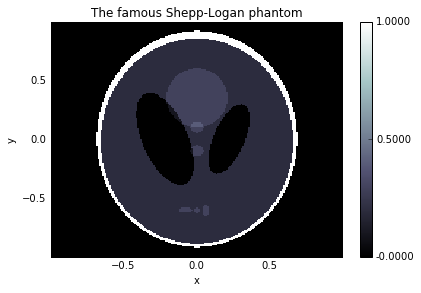

In [6]:
% matplotlib inline
phantom = odl.util.phantom.shepp_logan(l2_discr, modified=True)  # Create a Shepp-Logan phantom in the chosen space
fig = phantom.show('The famous Shepp-Logan phantom')  # Storing the figure to suppress (double) instant plotting

In [7]:
phantom.norm()  # Approximation to the true function norm

0.492870165459424

In [8]:
one = l2_discr.one()  # The constant one function
one.norm()  # Square root of the domain area

2.0

In [9]:
lincomb = 2 * phantom + 3 * one  # This creates a new element 'lincomb'
lincomb.norm()

6.5469354663078825

We can also do computations in place to avoid allocation of new memory. The `element()` method can be used to simply allocate memory for a re-usable temporary element which can hold intermediate values:

In [10]:
buffer = l2_discr.element()  # Uninitialized memory
buffer.lincomb(2, phantom, 3, one)  # Same linear combination as above, but the result is stored in 'buffer'
buffer.norm()

6.5469354663078825